# Business Problem
A house buyer asigns me a task about the house in King County. He wants to buy a house in this area but don't have any idea about the house market. And he has some prefer features in his mind, he want to have a predicted price so that he can prepare for that. 

Here is his prefer features:

# Plan
In this business probelm, I will use King County House Sales dataset to analyze. Base on this situation, I am planning give him a overview about the house market and how the footage of the home(sqft_living) affect the price. At last, I will make a prediction of price with his prefer features using model. Therefore, I divide this issue into three parts.
#### What features do he need to concern about?
    Find the most related features with the price.
    
#### How the footage of the home(sqft_living) affect the price?
    Find the correlation between them and the regression model.
    
#### How much should he prepare for the dream house?
    Find the prediction of price with model.

# EDA

### Import and Preview

In [1]:
# import libraries
import numpy as np
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
from itertools import combinations
import scipy.stats as stats

#from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
#from sklearn import linear_model
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


#from yellowbrick.datasets import load_concrete
#from yellowbrick.regressor import ResidualsPlot

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# import dataset
df = pd.read_csv("/Users/jrchen/flatiron-ds-course/Milestones/dsc-phase-2-project-online/data/clean_data.csv")

### Column Names and descriptions for Kings County Data Set


id - unique identified for a house\
dateDate - house was sold\
pricePrice - is prediction target\
bedroomsNumber - of Bedrooms/House\
bathroomsNumber - of bathrooms/bedrooms\
sqft_livingsquare - footage of the home\
sqft_lotsquare - footage of the lot\
floorsTotal - floors (levels) in house\
waterfront - House which has a view to a waterfront\
view - Has been viewed\
condition - How good the condition is ( Overall )\
grade - overall grade given to the housing unit, based on King County grading system\
sqft_above - square footage of house apart from basement\
sqft_basement - square footage of the basement\
yr_built - Built Year\
yr_renovated - Year when house was renovated\
zipcode - zip\
lat - Latitude coordinate\
long - Longitude coordinate\
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors\
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [3]:
df.drop(columns=['Unnamed: 0', 'id', 'date'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,basement_exist,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,604000.0,4,3.0,1960,5000,1.0,5,7,1050,1.0,1965,98136,47.5208,-122.393,1360,5000
1,510000.0,3,2.0,1680,8080,1.0,3,8,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
2,229500.0,3,1.0,1780,7470,1.0,3,7,1050,1.0,1960,98146,47.5123,-122.337,1780,8113
3,323000.0,3,2.5,1890,6560,2.0,3,7,1890,0.0,2003,98038,47.3684,-122.031,2390,7570
4,468000.0,2,1.0,1160,6000,1.0,4,7,860,1.0,1942,98115,47.6900,-122.292,1330,6000


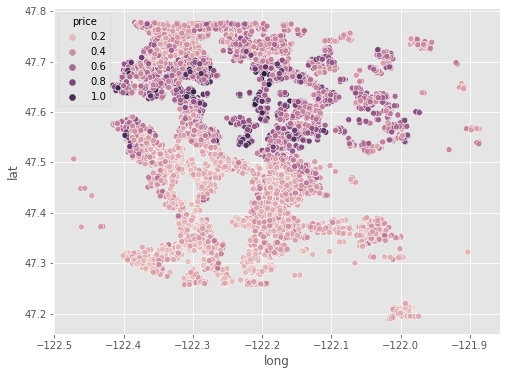

In [4]:
# preview the location and price
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['long'],
               y=df['lat'], 
                hue=df['price'], x_bins='auto')
plt.show()

## Q1: Most Related Features
    Find the most related features with the price.


### Heatmap

In [5]:
# drop some unmeaningful features
corr = df.drop(columns=['lat', 'long']).corr()
corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,basement_exist,yr_built,zipcode,sqft_living15,sqft_lot15
price,1.000000,0.214323,0.311205,0.482226,-0.103338,0.202976,0.107599,0.492610,0.360844,0.195641,-0.070664,0.019162,0.397930,-0.114688
bedrooms,0.214323,1.000000,0.436104,0.618380,0.219435,0.102943,0.041437,0.270025,0.469946,0.137732,0.132118,-0.178410,0.402405,0.207105
bathrooms,0.311205,0.436104,1.000000,0.656134,-0.086872,0.501724,-0.139527,0.563841,0.571460,0.144705,0.575255,-0.232085,0.489393,-0.094423
sqft_living,0.482226,0.618380,0.656134,1.000000,0.183101,0.268906,-0.031015,0.590063,0.786529,0.231136,0.295725,-0.226205,0.690557,0.164564
sqft_lot,-0.103338,0.219435,-0.086872,0.183101,1.000000,-0.439124,0.154619,-0.043543,0.124959,-0.021787,-0.102260,-0.264931,0.220519,0.880619
floors,0.202976,0.102943,0.501724,0.268906,-0.439124,1.000000,-0.288480,0.459848,0.505797,-0.278165,0.530739,-0.046890,0.212493,-0.451579
condition,0.107599,0.041437,-0.139527,-0.031015,0.154619,-0.288480,1.000000,-0.176793,-0.160798,0.114455,-0.398609,-0.009633,-0.104246,0.159642
grade,0.492610,0.270025,0.563841,0.590063,-0.043543,0.459848,-0.176793,1.000000,0.617013,0.001998,0.488026,-0.202482,0.581255,-0.039026
sqft_above,0.360844,0.469946,0.571460,0.786529,0.124959,0.505797,-0.160798,0.617013,1.000000,-0.325537,0.436859,-0.308368,0.663008,0.108971
basement_exist,0.195641,0.137732,0.144705,0.231136,-0.021787,-0.278165,0.114455,0.001998,-0.325537,1.000000,-0.157186,0.156164,0.016445,-0.023665


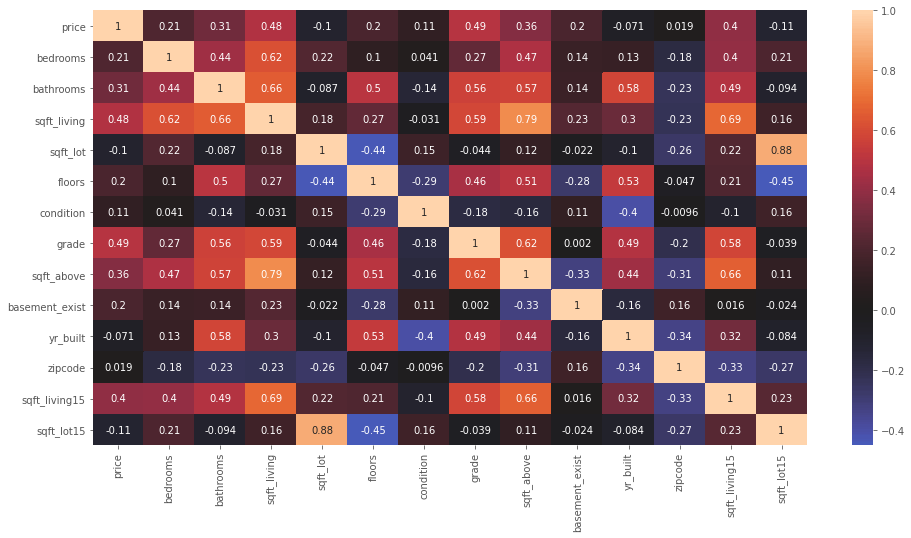

In [6]:
# transfer to a heatmap
plt.figure(figsize=(16,8))
sns.heatmap(corr, center=0, annot=True);
plt.show()

In [7]:
# sort the corr into a list
corr_dict = {}
for i in corr.columns:
    corr_dict[i] = corr[i]['price']
sort_orders = sorted(corr_dict.items(), key=lambda x: x[1], reverse=True)
sort_orders

[('price', 1.0),
 ('grade', 0.49261027416442066),
 ('sqft_living', 0.48222641077964523),
 ('sqft_living15', 0.3979299346232877),
 ('sqft_above', 0.36084369884935624),
 ('bathrooms', 0.3112049323614764),
 ('bedrooms', 0.21432266736607247),
 ('floors', 0.20297606726310086),
 ('basement_exist', 0.19564092494704588),
 ('condition', 0.10759942018093975),
 ('zipcode', 0.019162250231750035),
 ('yr_built', -0.07066375804244265),
 ('sqft_lot', -0.10333797300264337),
 ('sqft_lot15', -0.1146877232085822)]

From the heatmap and corr sorted list above, we can find the top related features with price. And these cloumns are grade, sqft_living, sqft_living15, sqft_above, bathrooms. However, the cc here of them are not to big which means they are not so related with price.

### Conclusion 
The most realted features with price are grade, sqft_living, sqft_living15, sqft_above, bathrooms.\
We also can say that the price is most realted to the house area and living enviornment.

## Q2: Home Size Effect
    Find the correlation between price and sqft_living and make the regression model.


In [8]:
# select features for analyzing
selceted_features = ['price', 'sqft_living']
df_size = df[selceted_features]

In [9]:
df_size.corr()

,price,sqft_living
price,1.000000,0.482226
sqft_living,0.482226,1.000000


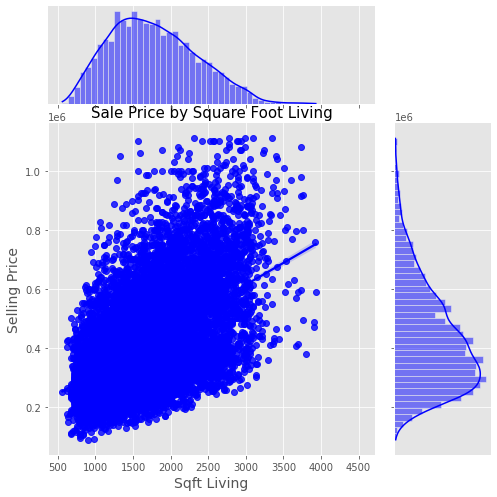

In [10]:
# graph plot
sns.jointplot(x = 'sqft_living', y = 'price' , data = df, kind = 'reg', height = 7, xlim = (370, 4720), 
              color = 'b', ratio = 3)
plt.title('Sale Price by Square Foot Living', fontsize = 15)
plt.ylabel('Selling Price', fontsize = 14)
plt.xlabel('Sqft Living', fontsize = 14)
plt.show()

In [11]:
# a function to build a model
def build_model(df, outcome):
    predictors = ' + '.join(df.drop(columns=[outcome]).columns)
    formula = outcome + ' ~ ' + predictors
    model = ols(formula=formula, data=df).fit()
    return model

In [12]:
# build the model and look at the summary
build_model(df[['price', 'sqft_living']], 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     3033.
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:42:15   Log-Likelihood:            -1.3382e+05
No. Observations:               10013   AIC:                         2.676e+05
Df Residuals:                   10011   BIC:                         2.677e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      1.7e+05   5007.758     33.939      0.000     1.6e+05     1.8e+05
sqft_living   148.0812      2.689     55.076      0.000     142.811     153.352
==============================================================================
Omnibus:                      626.062   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              747.459
Skew:                           0.656   Prob(JB):                    4.91e-163
Kurtosis:                       3.266   Cond. No.                     6.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion
The correlation between sqft_living and price is around 0.233. It means they are light related. And also found that each sqft_living cost $148.08 by the coefficient. 

## Q3: Prediction
    Find the prediction of price with model.

### Normalization

In [13]:
# Before doing the normalizaiton, let check the r square 
model = build_model(df, 'price')
model.rsquared

0.6449675491288918

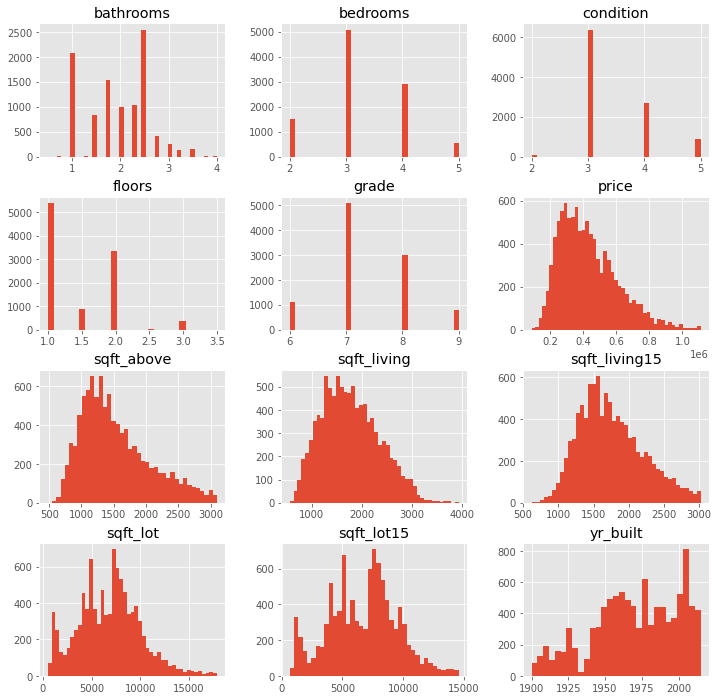

In [14]:
# Select non zero-inflated continuous features as df_cont base on the hist graph and other features stroe in df_others
df_cont = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 
              'grade', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']]
df_cat = df['basement_exist']
zip_dummies = pd.get_dummies(df['zipcode'], prefix='zip', drop_first=True)
df_cont.hist(figsize=(12,12), bins='auto')
plt.show()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     1211.
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:42:18   Log-Likelihood:            -1.2996e+05
No. Observations:               10013   AIC:                         2.599e+05
Df Residuals:                    9997   BIC:                         2.601e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.425e+06   2.31e+06      2.351      0.019    9.03e+05    9.95e+06
bedrooms       -9827.7884   1793.360     -5.480      0.000   -1.33e+04   -6312.441
bathrooms       1.536e+04   2760.283      5.564      0.000    9946.538    2.08e+04
sqft_living       52.8881      6.047      8.747      0.000      41.036      64.741
sqft_lot          -3.3170      0.712     -4.656      0.000      -4.713      -1.921
floors          1.018e+04   3236.309      3.147      0.002    3840.296    1.65e+04
condition       2.761e+04   1802.495     15.315      0.000    2.41e+04    3.11e+04
grade           7.477e+04   2030.256     36.829      0.000    7.08e+04    7.88e+04
sqft_above        48.9395      6.702      7.302      0.000      35.801      62.078
basement_exist   3.45e+04   4318.123      7.989      0.000     2.6e+04     4.3e+04
yr_built       -1960.4007     57.491    -34.099      0.000   -2073.095   -1847.706
zipcode         -269.9394     26.242    -10.286      0.000    -321.379    -218.499
lat              5.36e+05   8067.943     66.431      0.000     5.2e+05    5.52e+05
long            8150.4500   1.27e+04      0.642      0.521   -1.67e+04     3.3e+04
sqft_living15     42.4713      3.599     11.801      0.000      35.416      49.526
sqft_lot15        -5.5354      0.814     -6.797      0.000      -7.132      -3.939
==============================================================================
Omnibus:                     1214.285   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2537.857
Skew:                           0.754   Prob(JB):                         0.00
Kurtosis:                       4.952   Cond. No.                     2.17e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model 1: Non-transformation

In [16]:
df_final = pd.concat([df_cont, df_cat, zip_dummies], axis=1)
df_final.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,604000.0,4,3.0,1960,5000,1.0,5,7,1050,1965,...,0,0,0,0,0,0,0,0,0,0
1,510000.0,3,2.0,1680,8080,1.0,3,8,1680,1987,...,0,0,0,0,0,0,0,0,0,0
2,229500.0,3,1.0,1780,7470,1.0,3,7,1050,1960,...,1,0,0,0,0,0,0,0,0,0
3,323000.0,3,2.5,1890,6560,2.0,3,7,1890,2003,...,0,0,0,0,0,0,0,0,0,0
4,468000.0,2,1.0,1160,6000,1.0,4,7,860,1942,...,0,0,0,0,0,0,0,0,0,0


In [17]:
model = build_model(df_final, 'price')
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     572.6
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:42:19   Log-Likelihood:            -1.2651e+05
No. Observations:               10013   AIC:                         2.532e+05
Df Residuals:                    9932   BIC:                         2.538e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.185e+05   9.12e+04      5.682      0.000     3.4e+05    6.97e+05
bedrooms       -2731.6781   1296.153     -2.108      0.035   -5272.401    -190.955
bathrooms       1.157e+04   1976.456      5.855      0.000    7698.809    1.54e+04
sqft_living       58.3540      4.337     13.455      0.000      49.853      66.856
sqft_lot           1.0410      0.512      2.032      0.042       0.037       2.045
floors         -1.694e+04   2405.899     -7.040      0.000   -2.17e+04   -1.22e+04
condition       2.399e+04   1317.520     18.206      0.000    2.14e+04    2.66e+04
grade           3.758e+04   1541.276     24.383      0.000    3.46e+04    4.06e+04
sqft_above        70.6352      4.817     14.664      0.000      61.193      80.077
yr_built        -446.8706     46.827     -9.543      0.000    -538.661    -355.080
sqft_living15     27.6672      2.650     10.439      0.000      22.472      32.862
sqft_lot15         0.3735      0.614      0.608      0.543      -0.830       1.577
basement_exist  1.423e+04   3120.336      4.562      0.000    8117.971    2.04e+04
zip_98002       1.026e+04   8712.368      1.178      0.239   -6816.897    2.73e+04
zip_98003       4512.4251   8032.950      0.562      0.574   -1.12e+04    2.03e+04
zip_98004       5.143e+05   1.04e+04     49.317      0.000    4.94e+05    5.35e+05
zip_98005       3.399e+05   1.05e+04     32.236      0.000    3.19e+05    3.61e+05
zip_98006       2.597e+05   8181.002     31.742      0.000    2.44e+05    2.76e+05
zip_98007       2.465e+05   1.04e+04     23.722      0.000    2.26e+05    2.67e+05
zip_98008       2.307e+05   8258.257     27.930      0.000    2.14e+05    2.47e+05
zip_98010       7.274e+04   1.95e+04      3.727      0.000    3.45e+04    1.11e+05
zip_98011       1.455e+05   9342.644     15.574      0.000    1.27e+05    1.64e+05
zip_98014       1.185e+05   2.43e+04      4.877      0.000    7.08e+04    1.66e+05
zip_98019       8.992e+04   1.04e+04      8.667      0.000    6.96e+04     1.1e+05
zip_98022       8144.9753   1.03e+04      0.793      0.428    -1.2e+04    2.83e+04
zip_98023      -1.101e+04   7198.425     -1.530      0.126   -2.51e+04    3096.856
zip_98024       1.497e+05   2.23e+04      6.705      0.000    1.06e+05    1.93e+05
zip_98027       2.236e+05   8998.160     24.844      0.000    2.06e+05    2.41e+05
zip_98028       1.368e+05   8206.512     16.668      0.000    1.21e+05    1.53e+05
zip_98029       2.348e+05   7997.747     29.362      0.000    2.19e+05    2.51e+05
zip_98030       3455.4636   8151.855      0.424      0.672   -1.25e+04    1.94e+04
zip_98031       1.251e+04   8016.012      1.560      0.119   -3205.009    2.82e+04
zip_98032       -601.9965   1.01e+04     -0.059      0.953   -2.05e+04    1.93e+04
zip_98033       3.014e+05   7900.174     38.155      0.000    2.86e+05    3.17e+05
zip_98034   

In [18]:
# vif function to get a list of high vif features
def vif_over(df, value, response):
    vif_list = []
    X = df.drop(columns=[response])
    X = add_constant(X)
    vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    for i in list(zip(X, vif)):
        if i[1] > value:
            vif_list.append(i)
    return vif_list

The Variance Inflation Factor (VIF) is 1/Tolerance, it is always greater than or equal to 1. There is no formal VIF value for determining presence of multicollinearity. Values of VIF that exceed 10 are often regarded as indicating multicollinearity, but in weaker models values above 2.5 may be a cause for concern.

However, I will use 3.5 as a upper bond here because I don't want to drop any zip code columns

In [19]:
# a while loop function thta drop the highest vif each time until all vif in the range we set except intercept
def drop_high_vif(df, value, response):
    while (len(vif_over(df, value, response)) > 1):
        vif_list = vif_over(df, value, response)
        if vif_list[0][0] == 'const':
            vif_list.pop(0)
        drop = vif_list[0]
        for n in vif_list:
            if n[1] > drop[1]:
                drop = n
        df_final.drop(columns=[drop[0]], inplace=True)   

In [20]:
drop_high_vif(df_final, 3.5, 'price')

Validation

In [21]:
# a function to calculate the mse of train set and test set
# also plot the qq-plot
def test(df, response):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=[response]), 
                                                    df[response], test_size=0.2)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test
    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)
    print('Train Mean Squarred Error:', train_mse)
    print('Test Mean Squarred Error:', test_mse)
    sm.graphics.qqplot(train_residuals, dist=stats.norm, line='45', fit=True)
    plt.show()

Train Mean Squarred Error: 6498806863.180901
Test Mean Squarred Error: 7213066556.34155


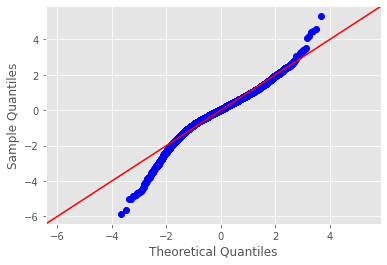

In [22]:
test(df_final, 'price')

In [23]:
# do cross valiation
def cross_valiation(df, response):
    X = df_final.drop(columns=[response])
    y = df_final[response]
    mse = make_scorer(mean_squared_error)
    linreg = LinearRegression()
    cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)
    return cv_5_results.mean()

In [24]:
#cross_valiation(df_final, 'price')

In [25]:
build_model(df_final, 'price').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     474.0
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:42:46   Log-Likelihood:            -1.2742e+05
No. Observations:               10013   AIC:                         2.550e+05
Df Residuals:                    9935   BIC:                         2.556e+05
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.026e+06   9.91e+04     10.351      0.000    8.32e+05    1.22e+06
bedrooms        1.911e+04   1298.605     14.712      0.000    1.66e+04    2.17e+04
bathrooms       3.598e+04   2063.902     17.431      0.000    3.19e+04       4e+04
sqft_lot           3.4455      0.381      9.043      0.000       2.699       4.192
floors          8309.2549   2473.675      3.359      0.001    3460.351    1.32e+04
condition       2.368e+04   1435.473     16.498      0.000    2.09e+04    2.65e+04
grade           5.862e+04   1604.126     36.545      0.000    5.55e+04    6.18e+04
yr_built        -799.6154     50.553    -15.817      0.000    -898.710    -700.521
sqft_living15     76.1879      2.639     28.871      0.000      71.015      81.361
basement_exist  4075.1012   2106.457      1.935      0.053     -53.982    8204.185
zip_98002       2.068e+04   9538.971      2.168      0.030    1978.048    3.94e+04
zip_98003       -134.8511   8800.185     -0.015      0.988   -1.74e+04    1.71e+04
zip_98004       4.937e+05   1.14e+04     43.263      0.000    4.71e+05    5.16e+05
zip_98005       3.376e+05   1.15e+04     29.236      0.000    3.15e+05     3.6e+05
zip_98006       2.463e+05   8945.514     27.536      0.000    2.29e+05    2.64e+05
zip_98007       2.338e+05   1.14e+04     20.552      0.000    2.12e+05    2.56e+05
zip_98008       2.219e+05   9045.042     24.538      0.000    2.04e+05     2.4e+05
zip_98010       7.888e+04   2.14e+04      3.692      0.000     3.7e+04    1.21e+05
zip_98011        1.46e+05   1.02e+04     14.263      0.000    1.26e+05    1.66e+05
zip_98014       1.295e+05   2.66e+04      4.869      0.000    7.74e+04    1.82e+05
zip_98019       9.839e+04   1.14e+04      8.659      0.000    7.61e+04    1.21e+05
zip_98022       1.164e+04   1.13e+04      1.034      0.301   -1.04e+04    3.37e+04
zip_98023      -1.702e+04   7885.335     -2.158      0.031   -3.25e+04   -1562.650
zip_98024       1.582e+05   2.44e+04      6.474      0.000     1.1e+05    2.06e+05
zip_98027       2.158e+05   9843.690     21.922      0.000    1.96e+05    2.35e+05
zip_98028       1.323e+05   8988.284     14.716      0.000    1.15e+05     1.5e+05
zip_98029       2.279e+05   8728.218     26.114      0.000    2.11e+05    2.45e+05
zip_98030       8197.7495   8927.382      0.918      0.358   -9301.730    2.57e+04
zip_98031       8307.5993   8780.669      0.946      0.344   -8904.292    2.55e+04
zip_98032      -5559.5735   1.11e+04     -0.500      0.617   -2.73e+04    1.62e+04
zip_98033       2.953e+05   8653.712     34.118      0.000    2.78e+05    3.12e+05
zip_98034       1.799e+05   7713.217     23.327      0.000    1.65e+05    1.95e+05
zip_98038       4.701e+04   7753.886      6.062      0.000    3.18e+04    6.22e+04
zip_98039        5.48e+05   4.76e+04     11.513      0.000    4.55e+05    6.41e+05
zip_98040   

## Model 2: Log transformations and Standardize

### Log transformations

In [26]:
def log(df):
    log_names = [f'{column}_log' for column in df.columns]

    df_log = np.log(df_cont)
    df_log.columns = log_names
#    df_log.hist(figsize=(10, 10), bins='auto')
#    plt.show()
    return df_log

In [27]:
df_log = log(df_cont)

### Standardize

In [28]:
# create a normalize function that apply to each feature
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_nor = df_log.apply(normalize)
#df_log_nor.hist(figsize  = [8, 8]);

In [29]:
# concat the transfromation features with other features and this will be our new transformation data
df_final = pd.concat([df_log_nor, df_cat, zip_dummies], axis=1)
df_final.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,condition_log,grade_log,sqft_above_log,yr_built_log,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,1.026396,0.971686,1.329546,0.461458,-0.275873,-0.874447,2.186717,-0.402860,-0.940504,-0.182300,...,0,0,0,0,0,0,0,0,0,0
1,0.607741,-0.202156,0.225647,0.002613,0.519625,-0.874447,-0.667711,0.859884,0.444141,0.566281,...,0,0,0,0,0,0,0,0,0,0
2,-1.368445,-0.202156,-1.661480,0.174719,0.389521,-0.874447,-0.667711,-0.402860,-0.940504,-0.353600,...,1,0,0,0,0,0,0,0,0,0
3,-0.522667,-0.202156,0.833167,0.353206,0.174211,1.085880,-0.667711,-0.402860,0.791133,1.105515,...,0,0,0,0,0,0,0,0,0,0
4,0.395047,-1.856592,-1.661480,-1.099840,0.026315,-0.874447,0.939820,-0.402860,-1.528569,-0.973921,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# vif
drop_high_vif(df_final, 3.5, 'price_log')

Train Mean Squarred Error: 0.18165746954908016
Test Mean Squarred Error: 0.19333286569229968


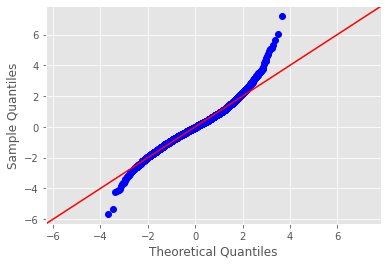

In [31]:
test(df_final, 'price_log')

In [32]:
#cross_valiation(df_final, 'price_log')

In [33]:
build_model(df_final, 'price_log').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     573.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:43:16   Log-Likelihood:                -5724.0
No. Observations:               10013   AIC:                         1.160e+04
Df Residuals:                    9935   BIC:                         1.217e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.1693      0.033    -35.211      0.000      -1.234      -1.104
bedrooms_log          0.0716      0.005     13.361      0.000       0.061       0.082
bathrooms_log         0.1253      0.007     17.734      0.000       0.111       0.139
floors_log            0.0772      0.007     10.594      0.000       0.063       0.091
condition_log         0.0778      0.005     15.593      0.000       0.068       0.088
grade_log             0.2316      0.007     35.303      0.000       0.219       0.244
yr_built_log         -0.0863      0.008    -11.160      0.000      -0.101      -0.071
sqft_living15_log     0.1944      0.006     30.322      0.000       0.182       0.207
sqft_lot15_log        0.1250      0.007     17.066      0.000       0.111       0.139
basement_exist        0.0687      0.011      6.092      0.000       0.047       0.091
zip_98002             0.0677      0.050      1.346      0.178      -0.031       0.166
zip_98003             0.0076      0.046      0.163      0.870      -0.083       0.098
zip_98004             2.5644      0.060     42.638      0.000       2.447       2.682
zip_98005             1.9432      0.061     31.938      0.000       1.824       2.062
zip_98006             1.5394      0.047     32.696      0.000       1.447       1.632
zip_98007             1.5780      0.060     26.321      0.000       1.461       1.696
zip_98008             1.5684      0.048     32.883      0.000       1.475       1.662
zip_98010             0.4177      0.113      3.710      0.000       0.197       0.638
zip_98011             1.1298      0.054     20.960      0.000       1.024       1.236
zip_98014             0.9544      0.140      6.814      0.000       0.680       1.229
zip_98019             0.8122      0.060     13.572      0.000       0.695       0.930
zip_98022             0.0538      0.059      0.908      0.364      -0.062       0.170
zip_98023            -0.0782      0.042     -1.884      0.060      -0.160       0.003
zip_98024             1.1098      0.129      8.616      0.000       0.857       1.362
zip_98027             1.5273      0.052     29.254      0.000       1.425       1.630
zip_98028             1.0388      0.047     21.938      0.000       0.946       1.132
zip_98029             1.5559      0.046     33.780      0.000       1.466       1.646
zip_98030             0.1625      0.047      3.456      0.001       0.070       0.255
zip_98031             0.1496      0.046      3.234      0.001       0.059       0.240
zip_98032            -0.0329      0.059     -0.562      0.574      -0.148       0.082
zip_98033             1.7983      0.046     39.459      0.000       1.709       1.888
zip_98034             1.3181      0.041     32.439      0.000       1.238       1.398
zip_98038             0.4258      0.041     10.430      0.000       0.346

## Model 3: Log transformation and Min-max Scaling

### Min-max Scaling

In [34]:
# create a min-max scaling function that apply to each feature
def minmax(feature):
    return (feature-feature.min()) / (feature.max()-feature.min())

df_log_mm = df_log.apply(minmax)

In [35]:
# concat the transfromation features with other features and this will be our new transformation data
df_final = pd.concat([df_log_mm, df_cat, zip_dummies], axis=1)
df_final.head()

,price_log,bedrooms_log,bathrooms_log,sqft_living_log,sqft_lot_log,floors_log,condition_log,grade_log,sqft_above_log,yr_built_log,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0.758848,0.756471,0.861654,0.642951,0.640013,0.000000,1.000000,0.380182,0.419627,0.572419,...,0,0,0,0,0,0,0,0,0,0
1,0.691813,0.442507,0.666667,0.563837,0.775730,0.000000,0.442507,0.709511,0.671589,0.761879,...,0,0,0,0,0,0,0,0,0,0
2,0.375381,0.442507,0.333333,0.593511,0.753533,0.000000,0.442507,0.380182,0.419627,0.529064,...,1,0,0,0,0,0,0,0,0,0
3,0.510809,0.442507,0.773976,0.624286,0.716800,0.553295,0.442507,0.380182,0.734731,0.898356,...,0,0,0,0,0,0,0,0,0,0
4,0.657755,0.000000,0.333333,0.373751,0.691568,0.000000,0.756471,0.380182,0.312617,0.372064,...,0,0,0,0,0,0,0,0,0,0


In [36]:
drop_high_vif(df_final, 3.5, 'price_log')

### test

Train Mean Squarred Error: 0.004648907328939449
Test Mean Squarred Error: 0.005001517129981933


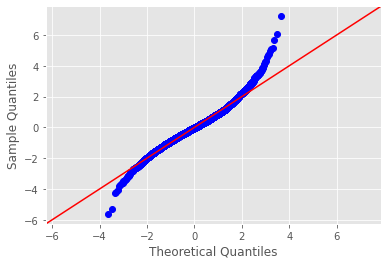

In [37]:
test(df_final, 'price_log')

In [38]:
#cross_valiation(df_final, 'price_log')

In [39]:
build_model(df_final, 'price_log').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     573.4
Date:                Sat, 10 Oct 2020   Prob (F-statistic):               0.00
Time:                        23:43:44   Log-Likelihood:                 12618.
No. Observations:               10013   AIC:                        -2.508e+04
Df Residuals:                    9935   BIC:                        -2.452e+04
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0315      0.009      3.443      0.001       0.014       0.049
bedrooms_log          0.0428      0.003     13.361      0.000       0.037       0.049
bathrooms_log         0.1136      0.006     17.734      0.000       0.101       0.126
floors_log            0.0438      0.004     10.594      0.000       0.036       0.052
condition_log         0.0638      0.004     15.593      0.000       0.056       0.072
grade_log             0.1422      0.004     35.303      0.000       0.134       0.150
yr_built_log         -0.0546      0.005    -11.160      0.000      -0.064      -0.045
sqft_living15_log     0.1894      0.006     30.322      0.000       0.177       0.202
sqft_lot15_log        0.1131      0.007     17.066      0.000       0.100       0.126
basement_exist        0.0110      0.002      6.092      0.000       0.007       0.015
zip_98002             0.0108      0.008      1.346      0.178      -0.005       0.027
zip_98003             0.0012      0.007      0.163      0.870      -0.013       0.016
zip_98004             0.4106      0.010     42.638      0.000       0.392       0.429
zip_98005             0.3111      0.010     31.938      0.000       0.292       0.330
zip_98006             0.2465      0.008     32.696      0.000       0.232       0.261
zip_98007             0.2527      0.010     26.321      0.000       0.234       0.271
zip_98008             0.2511      0.008     32.883      0.000       0.236       0.266
zip_98010             0.0669      0.018      3.710      0.000       0.032       0.102
zip_98011             0.1809      0.009     20.960      0.000       0.164       0.198
zip_98014             0.1528      0.022      6.814      0.000       0.109       0.197
zip_98019             0.1301      0.010     13.572      0.000       0.111       0.149
zip_98022             0.0086      0.009      0.908      0.364      -0.010       0.027
zip_98023            -0.0125      0.007     -1.884      0.060      -0.026       0.001
zip_98024             0.1777      0.021      8.616      0.000       0.137       0.218
zip_98027             0.2446      0.008     29.254      0.000       0.228       0.261
zip_98028             0.1663      0.008     21.938      0.000       0.151       0.181
zip_98029             0.2491      0.007     33.780      0.000       0.235       0.264
zip_98030             0.0260      0.008      3.456      0.001       0.011       0.041
zip_98031             0.0240      0.007      3.234      0.001       0.009       0.038
zip_98032            -0.0053      0.009     -0.562      0.574      -0.024       0.013
zip_98033             0.2880      0.007     39.459      0.000       0.274       0.302
zip_98034             0.2111      0.007     32.439      0.000       0.198       0.224
zip_98038             0.0682      0.007     10.430      0.000       0.055

### Conclusion

Comparing these three models, two transformation models are better than the non transformation model by increasing the r square, reduce the condition number and kurtosis(not a much reduce). And two transformation models are similarly in this case.

# Future Work

## interactions

In [ ]:
#feat_combinations = combinations(X.columns, 2)

In [ ]:
#regression = LinearRegression()

In [ ]:
#crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
#baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
#baseline

In [ ]:
## code to find top interactions by R^2 value here
#interaction={}
#data = X.copy()
#for (a,b) in feat_combinations:
#    data['interaction'] = data[a] * data[b]
#    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
#    interaction[(a,b)] = score

In [ ]:
#sort_orders = sorted(interaction.items(), key=lambda x: x[1], reverse=True)
#for i in [0,1,2]:
#    print (sort_orders[i])

In [ ]:
#regression = LinearRegression()
#crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
#final = X.copy()

#final['a'] = final['grade'] * final['bathrooms#']

#final_model = np.mean(cross_val_score(regression, final, y, scoring='r2', cv=crossvalidation))

#final_model

In [ ]:
#df_inter_sm = sm.add_constant(final)
#model = sm.OLS(y,final)
#results = model.fit()

#results.summary()

### Prediction

The house buyer prefer to buy a house with 5 bedrooms, 2 bathrooms, 2 floors, no waterfront, no view, condition at least 4, grade at least 8, existed basement, built year no earlier than 1970, no renovated, zipcode 98124. And other features are flexible. He need to know how much of money should prepare.\
I will use his prefer features to predict and the mean values for those flexible features.

In [ ]:
def normalize_value(feature, value):
    return (value - df_log[feature].mean()) / df_log[feature].std()

In [ ]:
control = ['bedrooms_log', 'bathrooms_log', 'sqft_lot_log',
       'floors_log', 'condition_log', 'grade_log', 'sqft_living15_log']
prediction = [3, 2, 0, 0, 4, 8, 0, 1970, 0]
for a,b in zip(control, prediction):
    if b == 0:
        df_final.loc[15304, a] = normalize_value(a, np.log(df[a[:-4]].mean()))
    else:
        df_final.loc[15304, a] = normalize_value(a, np.log(b))

In [ ]:
df_final.loc[15304, 'waterfront'] = 0
df_final.loc[15304, 'basement_exist'] = 1
df_final.loc[15304, 'zip_98188'] = 1
df_final.fillna(0, inplace=True)

In [ ]:
y_test = df_final.drop(columns=['price_log']).loc[15304,:]
y_test

In [ ]:
df_final.tail()

In [ ]:
# y_pred should be around 13.053185 which is the mean of price after log
y_pred = model.predict(y_test)
y_pred

In [ ]:
df_log['price_log'].mean(), df_log['price_log'].std()

In [ ]:
price = 10 ** (y_pred * df_log['price_log'].std() + df_log['price_log'].mean())
price

try

In [ ]:
X_train = df_final.drop(columns=['price_log']).loc[:15303]
y_train = df_final.loc[:15303]['price_log']
X_test = df_final.drop(columns=['price_log']).loc[15304,:]

In [ ]:
X_train

In [ ]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

In [ ]:
linreg.predict(X_test)